<a href="https://colab.research.google.com/github/ywsyws/EcoleOrange/blob/master/fastai/Projects/FAST_AI_Semaine_1_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First project of CNN resnet model using cifar10 dataset found in fastai website

In [3]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0   8447      0 --:--:-- --:--:-- --:--:--  8447
Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [0]:
#path = untar_data(URLs.CIFAR); path
path = untar_data(URLs.CUB_200_2011); path

PosixPath('/content/data/CUB_200_2011')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/CUB_200_2011/attributes'),
 PosixPath('/root/.fastai/data/CUB_200_2011/train_test_split.txt'),
 PosixPath('/root/.fastai/data/CUB_200_2011/parts'),
 PosixPath('/root/.fastai/data/CUB_200_2011/image_class_labels.txt'),
 PosixPath('/root/.fastai/data/CUB_200_2011/images.txt'),
 PosixPath('/root/.fastai/data/CUB_200_2011/README'),
 PosixPath('/root/.fastai/data/CUB_200_2011/bounding_boxes.txt'),
 PosixPath('/root/.fastai/data/CUB_200_2011/images'),
 PosixPath('/root/.fastai/data/CUB_200_2011/classes.txt')]

In [0]:
#path_train = path/'train'
#path_test = path/'test'
path_img = path/'images'

In [0]:
#path_img.ls()
!ls /root/.fastai/data/CUB_200_2011/images

001.Black_footed_Albatross     101.White_Pelican
002.Laysan_Albatross	       102.Western_Wood_Pewee
003.Sooty_Albatross	       103.Sayornis
004.Groove_billed_Ani	       104.American_Pipit
005.Crested_Auklet	       105.Whip_poor_Will
006.Least_Auklet	       106.Horned_Puffin
007.Parakeet_Auklet	       107.Common_Raven
008.Rhinoceros_Auklet	       108.White_necked_Raven
009.Brewer_Blackbird	       109.American_Redstart
010.Red_winged_Blackbird       110.Geococcyx
011.Rusty_Blackbird	       111.Loggerhead_Shrike
012.Yellow_headed_Blackbird    112.Great_Grey_Shrike
013.Bobolink		       113.Baird_Sparrow
014.Indigo_Bunting	       114.Black_throated_Sparrow
015.Lazuli_Bunting	       115.Brewer_Sparrow
016.Painted_Bunting	       116.Chipping_Sparrow
017.Cardinal		       117.Clay_colored_Sparrow
018.Spotted_Catbird	       118.House_Sparrow
019.Gray_Catbird	       119.Field_Sparrow
020.Yellow_breasted_Chat       120.Fox_Sparrow
021.Eastern_Towhee	       121.Grasshopper_Sparrow
022.Chuck_will_Wi

In [0]:
!ls /root/.fastai/data/CUB_200_2011/images/'001.Black_footed_Albatross'

Black_Footed_Albatross_0001_796111.jpg	Black_Footed_Albatross_0047_796064.jpg
Black_Footed_Albatross_0002_55.jpg	Black_Footed_Albatross_0049_796063.jpg
Black_Footed_Albatross_0003_796136.jpg	Black_Footed_Albatross_0050_796125.jpg
Black_Footed_Albatross_0005_796090.jpg	Black_Footed_Albatross_0051_796103.jpg
Black_Footed_Albatross_0006_796065.jpg	Black_Footed_Albatross_0053_796109.jpg
Black_Footed_Albatross_0007_796138.jpg	Black_Footed_Albatross_0056_796078.jpg
Black_Footed_Albatross_0008_796083.jpg	Black_Footed_Albatross_0057_796106.jpg
Black_Footed_Albatross_0009_34.jpg	Black_Footed_Albatross_0058_796074.jpg
Black_Footed_Albatross_0010_796097.jpg	Black_Footed_Albatross_0060_796076.jpg
Black_Footed_Albatross_0014_89.jpg	Black_Footed_Albatross_0061_796082.jpg
Black_Footed_Albatross_0016_796067.jpg	Black_Footed_Albatross_0063_796141.jpg
Black_Footed_Albatross_0017_796098.jpg	Black_Footed_Albatross_0064_796101.jpg
Black_Footed_Albatross_0019_796104.jpg	Black_Footed_Albatross_0065_796068.jp

In [0]:
#!ls /content/data/cifar10/train

airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck


In [0]:
classes = ['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet',
           '006.Least_Auklet', '007.Parakeet_Auklet', '008.Rhinoceros_Auklet', '009.Brewer_Blackbird', '010.Red_winged_Blackbird',
           '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting',
           '016.Painted_Bunting', '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird', '020.Yellow_breasted_Chat',
           '021.Eastern_Towhee', '022.Chuck_will_Widow', '023.Brandt_Cormorant', '024.Red_faced_Cormorant', '025.Pelagic_Cormorant',
           '026.Bronzed_Cowbird', '027.Shiny_Cowbird', '028.Brown_Creeper', '029.American_Crow', '030.Fish_Crow',
           '031.Black_billed_Cuckoo', '032.Mangrove_Cuckoo', '033.Yellow_billed_Cuckoo', '034.Gray_crowned_Rosy_Finch',
           '035.Purple_Finch', '036.Northern_Flicker', '037.Acadian_Flycatcher', '038.Great_Crested_Flycatcher', '039.Least_Flycatcher',
           '040.Olive_sided_Flycatcher', '041.Scissor_tailed_Flycatcher', '042.Vermilion_Flycatcher', '043.Yellow_bellied_Flycatcher',
           '044.Frigatebird', '045.Northern_Fulmar', '046.Gadwall', '047.American_Goldfinch', '048.European_Goldfinch',
           '049.Boat_tailed_Grackle', '050.Eared_Grebe', '051.Horned_Grebe', '052.Pied_billed_Grebe', '053.Western_Grebe',
           '054.Blue_Grosbeak', '055.Evening_Grosbeak', '056.Pine_Grosbeak', '057.Rose_breasted_Grosbeak','058.Pigeon_Guillemot',
           '059.California_Gull', '060.Glaucous_winged_Gull', '061.Heermann_Gull', '062.Herring_Gull', '063.Ivory_Gull',
           '064.Ring_billed_Gull', '065.Slaty_backed_Gull', '066.Western_Gull', '067.Anna_Hummingbird', '068.Ruby_throated_Hummingbird',
           '069.Rufous_Hummingbird', '070.Green_Violetear', '071.Long_tailed_Jaeger', '072.Pomarine_Jaeger', '073.Blue_Jay', 
           '074.Florida_Jay', '075.Green_Jay', '076.Dark_eyed_Junco', '077.Tropical_Kingbird', '078.Gray_Kingbird',
           '079.Belted_Kingfisher', '080.Green_Kingfisher', '081.Pied_Kingfisher', '082.Ringed_Kingfisher',
           '083.White_breasted_Kingfisher', '084.Red_legged_Kittiwake', '085.Horned_Lark', '086.Pacific_Loon', '087.Mallard',
           '088.Western_Meadowlark', '089.Hooded_Merganser', '090.Red_breasted_Merganser', '091.Mockingbird', '092.Nighthawk',
           '093.Clark_Nutcracker', '094.White_breasted_Nuthatch', '095.Baltimore_Oriole', '096.Hooded_Oriole', '097.Orchard_Oriole',
           '098.Scott_Oriole', '099.Ovenbird', '100.Brown_Pelican', '101.White_Pelican', '102.Western_Wood_Pewee', '103.Sayornis',
           '104.American_Pipit', '105.Whip_poor_Will', '106.Horned_Puffin', '107.Common_Raven', '108.White_necked_Raven',
           '109.American_Redstart', '110.Geococcyx', '111.Loggerhead_Shrike', '112.Great_Grey_Shrike', '113.Baird_Sparrow',
           '114.Black_throated_Sparrow', '115.Brewer_Sparrow','116.Chipping_Sparrow', '117.Clay_colored_Sparrow', '118.House_Sparrow',
           '119.Field_Sparrow', '120.Fox_Sparrow', '121.Grasshopper_Sparrow', '122.Harris_Sparrow', '123.Henslow_Sparrow',
           '124.Le_Conte_Sparrow', '125.Lincoln_Sparrow', '126.Nelson_Sharp_tailed_Sparrow', '127.Savannah_Sparrow',
           '128.Seaside_Sparrow', '129.Song_Sparrow', '130.Tree_Sparrow', '131.Vesper_Sparrow', '132.White_crowned_Sparrow',
           '133.White_throated_Sparrow', '134.Cape_Glossy_Starling', '135.Bank_Swallow', '136.Barn_Swallow', '137.Cliff_Swallow',
           '138.Tree_Swallow','139.Scarlet_Tanager', '140.Summer_Tanager', '141.Artic_Tern', '142.Black_Tern', '143.Caspian_Tern',
           '144.Common_Tern', '145.Elegant_Tern', '146.Forsters_Tern', '147.Least_Tern', '148.Green_tailed_Towhee',
           '149.Brown_Thrasher', '150.Sage_Thrasher', '151.Black_capped_Vireo', '152.Blue_headed_Vireo', '153.Philadelphia_Vireo',
           '154.Red_eyed_Vireo', '155.Warbling_Vireo', '156.White_eyed_Vireo', '157.Yellow_throated_Vireo', '158.Bay_breasted_Warbler',
           '159.Black_and_white_Warbler', '160.Black_throated_Blue_Warbler', '161.Blue_winged_Warbler', '162.Canada_Warbler',
           '163.Cape_May_Warbler', '164.Cerulean_Warbler', '165.Chestnut_sided_Warbler', '166.Golden_winged_Warbler',
           '167.Hooded_Warbler', '168.Kentucky_Warbler', '169.Magnolia_Warbler', '170.Mourning_Warbler', '171.Myrtle_Warbler',
           '172.Nashville_Warbler', '173.Orange_crowned_Warbler', '174.Palm_Warbler', '175.Pine_Warbler', '176.Prairie_Warbler',
           '177.Prothonotary_Warbler', '178.Swainson_Warbler', '179.Tennessee_Warbler', '180.Wilson_Warbler', '181.Worm_eating_Warbler',
           '182.Yellow_Warbler', '183.Northern_Waterthrush', '184.Louisiana_Waterthrush', '185.Bohemian_Waxwing', '186.Cedar_Waxwing',
           '187.American_Three_toed_Woodpecker', '188.Pileated_Woodpecker', '189.Red_bellied_Woodpecker', '190.Red_cockaded_Woodpecker',
           '191.Red_headed_Woodpecker', '192.Downy_Woodpecker', '193.Bewick_Wren', '194.Cactus_Wren', '195.Carolina_Wren',
           '196.House_Wren', '197.Marsh_Wren', '198.Rock_Wren', '199.Winter_Wren', '200.Common_Yellowthroat']

In [0]:
for i in classes:
  print(i)
  verify_images(path_img/i)

001.Black_footed_Albatross


002.Laysan_Albatross


003.Sooty_Albatross


004.Groove_billed_Ani


005.Crested_Auklet


006.Least_Auklet


007.Parakeet_Auklet


008.Rhinoceros_Auklet


009.Brewer_Blackbird


010.Red_winged_Blackbird


011.Rusty_Blackbird


012.Yellow_headed_Blackbird


013.Bobolink


014.Indigo_Bunting


015.Lazuli_Bunting


016.Painted_Bunting


017.Cardinal


018.Spotted_Catbird


019.Gray_Catbird


020.Yellow_breasted_Chat


021.Eastern_Towhee


022.Chuck_will_Widow


023.Brandt_Cormorant


024.Red_faced_Cormorant


025.Pelagic_Cormorant


026.Bronzed_Cowbird


027.Shiny_Cowbird


028.Brown_Creeper


029.American_Crow


030.Fish_Crow


031.Black_billed_Cuckoo


032.Mangrove_Cuckoo


033.Yellow_billed_Cuckoo


034.Gray_crowned_Rosy_Finch


035.Purple_Finch


036.Northern_Flicker


037.Acadian_Flycatcher


038.Great_Crested_Flycatcher


039.Least_Flycatcher


040.Olive_sided_Flycatcher


041.Scissor_tailed_Flycatcher


042.Vermilion_Flycatcher


043.Yellow_bellied_Flycatcher


044.Frigatebird


045.Northern_Fulmar


046.Gadwall


047.American_Goldfinch


048.European_Goldfinch


049.Boat_tailed_Grackle


050.Eared_Grebe


051.Horned_Grebe


052.Pied_billed_Grebe


053.Western_Grebe


054.Blue_Grosbeak


055.Evening_Grosbeak


056.Pine_Grosbeak


057.Rose_breasted_Grosbeak


058.Pigeon_Guillemot


059.California_Gull


060.Glaucous_winged_Gull


061.Heermann_Gull


062.Herring_Gull


063.Ivory_Gull


064.Ring_billed_Gull


065.Slaty_backed_Gull


066.Western_Gull


067.Anna_Hummingbird


068.Ruby_throated_Hummingbird


069.Rufous_Hummingbird


070.Green_Violetear


071.Long_tailed_Jaeger


072.Pomarine_Jaeger


073.Blue_Jay


074.Florida_Jay


075.Green_Jay


076.Dark_eyed_Junco


077.Tropical_Kingbird


078.Gray_Kingbird


079.Belted_Kingfisher


080.Green_Kingfisher


081.Pied_Kingfisher


082.Ringed_Kingfisher


083.White_breasted_Kingfisher


084.Red_legged_Kittiwake


085.Horned_Lark


086.Pacific_Loon


087.Mallard


088.Western_Meadowlark


089.Hooded_Merganser


090.Red_breasted_Merganser


091.Mockingbird


092.Nighthawk


093.Clark_Nutcracker


094.White_breasted_Nuthatch


095.Baltimore_Oriole


096.Hooded_Oriole


097.Orchard_Oriole


098.Scott_Oriole


099.Ovenbird


100.Brown_Pelican


101.White_Pelican


102.Western_Wood_Pewee


103.Sayornis


104.American_Pipit


105.Whip_poor_Will


106.Horned_Puffin


107.Common_Raven


108.White_necked_Raven


109.American_Redstart


110.Geococcyx


111.Loggerhead_Shrike


112.Great_Grey_Shrike


113.Baird_Sparrow


114.Black_throated_Sparrow


115.Brewer_Sparrow


116.Chipping_Sparrow


117.Clay_colored_Sparrow


118.House_Sparrow


119.Field_Sparrow


120.Fox_Sparrow


121.Grasshopper_Sparrow


122.Harris_Sparrow


123.Henslow_Sparrow


124.Le_Conte_Sparrow


125.Lincoln_Sparrow


126.Nelson_Sharp_tailed_Sparrow


127.Savannah_Sparrow


128.Seaside_Sparrow


129.Song_Sparrow


130.Tree_Sparrow


131.Vesper_Sparrow


132.White_crowned_Sparrow


133.White_throated_Sparrow


134.Cape_Glossy_Starling


135.Bank_Swallow


136.Barn_Swallow


137.Cliff_Swallow


138.Tree_Swallow


139.Scarlet_Tanager


140.Summer_Tanager


141.Artic_Tern


142.Black_Tern


143.Caspian_Tern


144.Common_Tern


145.Elegant_Tern


146.Forsters_Tern


147.Least_Tern


148.Green_tailed_Towhee


149.Brown_Thrasher


150.Sage_Thrasher


151.Black_capped_Vireo


152.Blue_headed_Vireo


153.Philadelphia_Vireo


154.Red_eyed_Vireo


155.Warbling_Vireo


156.White_eyed_Vireo


157.Yellow_throated_Vireo


158.Bay_breasted_Warbler


159.Black_and_white_Warbler


160.Black_throated_Blue_Warbler


161.Blue_winged_Warbler


162.Canada_Warbler


163.Cape_May_Warbler


164.Cerulean_Warbler


165.Chestnut_sided_Warbler


166.Golden_winged_Warbler


167.Hooded_Warbler


168.Kentucky_Warbler


169.Magnolia_Warbler


170.Mourning_Warbler


171.Myrtle_Warbler


172.Nashville_Warbler


173.Orange_crowned_Warbler


174.Palm_Warbler


175.Pine_Warbler


176.Prairie_Warbler


177.Prothonotary_Warbler


178.Swainson_Warbler


179.Tennessee_Warbler


180.Wilson_Warbler


181.Worm_eating_Warbler


182.Yellow_Warbler


183.Northern_Waterthrush


184.Louisiana_Waterthrush


185.Bohemian_Waxwing


186.Cedar_Waxwing


187.American_Three_toed_Woodpecker


188.Pileated_Woodpecker


189.Red_bellied_Woodpecker


190.Red_cockaded_Woodpecker


191.Red_headed_Woodpecker


192.Downy_Woodpecker


193.Bewick_Wren


194.Cactus_Wren


195.Carolina_Wren


196.House_Wren


197.Marsh_Wren


198.Rock_Wren


199.Winter_Wren


200.Common_Yellowthroat


In [0]:
np.random.seed(42)

In [0]:
data = ImageDataBunch.from_folder(path, train= 'train', valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [0]:
data.classes

['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet',
 '006.Least_Auklet',
 '007.Parakeet_Auklet',
 '008.Rhinoceros_Auklet',
 '009.Brewer_Blackbird',
 '010.Red_winged_Blackbird',
 '011.Rusty_Blackbird',
 '012.Yellow_headed_Blackbird',
 '013.Bobolink',
 '014.Indigo_Bunting',
 '015.Lazuli_Bunting',
 '016.Painted_Bunting',
 '017.Cardinal',
 '018.Spotted_Catbird',
 '019.Gray_Catbird',
 '020.Yellow_breasted_Chat',
 '021.Eastern_Towhee',
 '022.Chuck_will_Widow',
 '023.Brandt_Cormorant',
 '024.Red_faced_Cormorant',
 '025.Pelagic_Cormorant',
 '026.Bronzed_Cowbird',
 '027.Shiny_Cowbird',
 '028.Brown_Creeper',
 '029.American_Crow',
 '030.Fish_Crow',
 '031.Black_billed_Cuckoo',
 '032.Mangrove_Cuckoo',
 '033.Yellow_billed_Cuckoo',
 '034.Gray_crowned_Rosy_Finch',
 '035.Purple_Finch',
 '036.Northern_Flicker',
 '037.Acadian_Flycatcher',
 '038.Great_Crested_Flycatcher',
 '039.Least_Flycatcher',
 '040.Olive_sided_Flycatcher',
 '

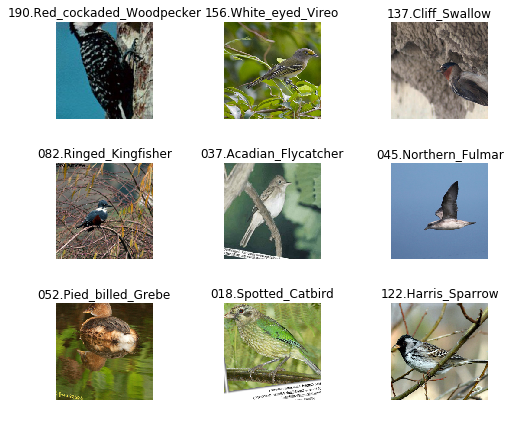

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet', '008.Rhinoceros_Auklet', '009.Brewer_Blackbird', '010.Red_winged_Blackbird', '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting', '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird', '020.Yellow_breasted_Chat', '021.Eastern_Towhee', '022.Chuck_will_Widow', '023.Brandt_Cormorant', '024.Red_faced_Cormorant', '025.Pelagic_Cormorant', '026.Bronzed_Cowbird', '027.Shiny_Cowbird', '028.Brown_Creeper', '029.American_Crow', '030.Fish_Crow', '031.Black_billed_Cuckoo', '032.Mangrove_Cuckoo', '033.Yellow_billed_Cuckoo', '034.Gray_crowned_Rosy_Finch', '035.Purple_Finch', '036.Northern_Flicker', '037.Acadian_Flycatcher', '038.Great_Crested_Flycatcher', '039.Least_Flycatcher', '040.Olive_sided_Flycatcher', '041.Scissor_tailed_Flycatcher', '042.Ver

(200, 200)

In [0]:
#learn.load('birds')

------

#Training: Resnet34

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 45487938.33it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.913529,2.261190,0.530759,03:11
1,2.004418,1.264353,0.341960,03:14
2,1.384274,1.046333,0.280866,03:09
3,1.111189,0.994340,0.274077,03:10


## Result

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

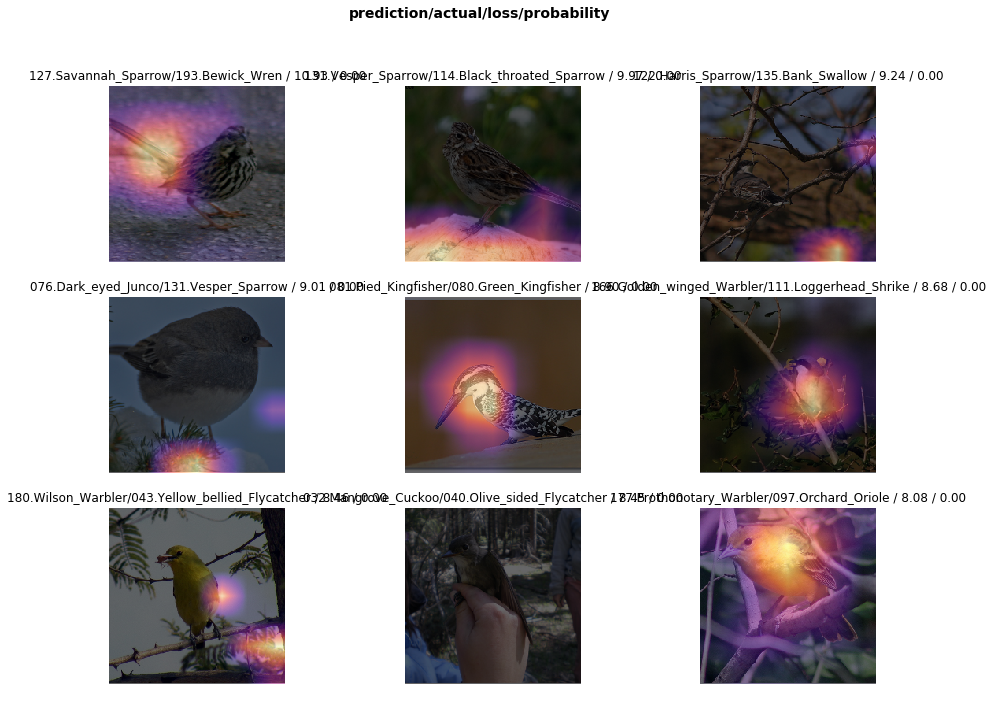

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

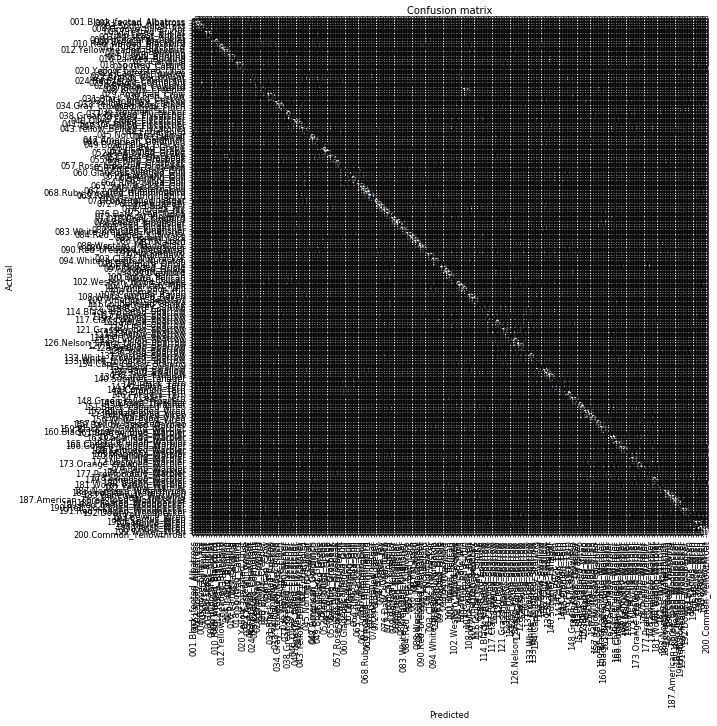

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('029.American_Crow', '107.Common_Raven', 10),
 ('144.Common_Tern', '146.Forsters_Tern', 8),
 ('051.Horned_Grebe', '050.Eared_Grebe', 5),
 ('043.Yellow_bellied_Flycatcher', '039.Least_Flycatcher', 4),
 ('050.Eared_Grebe', '051.Horned_Grebe', 4),
 ('059.California_Gull', '064.Ring_billed_Gull', 4),
 ('072.Pomarine_Jaeger', '071.Long_tailed_Jaeger', 4),
 ('080.Green_Kingfisher', '081.Pied_Kingfisher', 4),
 ('121.Grasshopper_Sparrow', '117.Clay_colored_Sparrow', 4),
 ('136.Barn_Swallow', '137.Cliff_Swallow', 4),
 ('141.Artic_Tern', '144.Common_Tern', 4),
 ('143.Caspian_Tern', '145.Elegant_Tern', 4),
 ('014.Indigo_Bunting', '054.Blue_Grosbeak', 3),
 ('037.Acadian_Flycatcher', '043.Yellow_bellied_Flycatcher', 3),
 ('038.Great_Crested_Flycatcher', '077.Tropical_Kingbird', 3),
 ('054.Blue_Grosbeak', '014.Indigo_Bunting', 3),
 ('059.California_Gull', '066.Western_Gull', 3),
 ('060.Glaucous_winged_Gull', '062.Herring_Gull', 3),
 ('071.Long_tailed_Jaeger', '072.Pomarine_Jaeger', 3),
 ('080.Gree

## Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.528010,0.992922,0.280441,03:21


In [0]:
learn.load('birds')

Learner(data=ImageDataBunch;

Train: LabelList (9431 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
141.Artic_Tern,141.Artic_Tern,141.Artic_Tern,141.Artic_Tern,141.Artic_Tern
Path: /root/.fastai/data/CUB_200_2011;

Valid: LabelList (2357 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
102.Western_Wood_Pewee,185.Bohemian_Waxwing,128.Seaside_Sparrow,158.Bay_breasted_Warbler,159.Black_and_white_Warbler
Path: /root/.fastai/data/CUB_200_2011;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
     

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


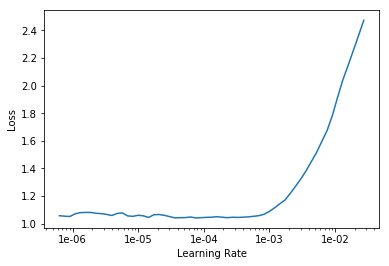

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.031270,0.959594,0.268137,03:22
1,0.971682,0.914828,0.261349,03:22
2,0.914169,0.888025,0.251591,03:24
3,0.874049,0.884608,0.249894,03:22


-----

## Training: resnet50

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [0]:
#learn.load('birds')

In [0]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,time
0,3.881530,2.407676,0.530759,03:49
1,2.036262,1.286089,0.360204,03:41
2,1.449121,1.076285,0.305473,03:40
3,1.086420,0.940813,0.266865,03:41
4,0.868008,0.869711,0.246076,03:41
5,0.677534,0.819793,0.226983,03:42
6,0.569996,0.808553,0.220619,03:40


In [0]:
learn.save('birds-50')

In [0]:
learn.unfreeze()
learn.load('birds-50')

Learner(data=ImageDataBunch;

Train: LabelList (9431 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
141.Artic_Tern,141.Artic_Tern,141.Artic_Tern,141.Artic_Tern,141.Artic_Tern
Path: /root/.fastai/data/CUB_200_2011;

Valid: LabelList (2357 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
102.Western_Wood_Pewee,185.Bohemian_Waxwing,128.Seaside_Sparrow,158.Bay_breasted_Warbler,159.Black_and_white_Warbler
Path: /root/.fastai/data/CUB_200_2011;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
     

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


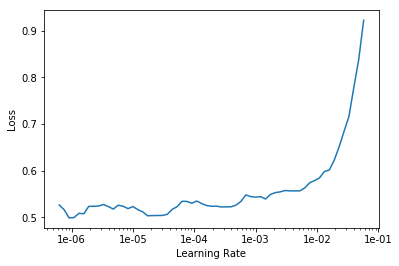

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.573412,0.811836,0.221892,03:57
1,0.605912,0.819959,0.223165,03:57
2,0.505074,0.780593,0.207043,03:59
3,0.359933,0.744145,0.202800,03:59
4,0.290956,0.735527,0.201527,03:58
